# Thinking

1.MVC框架指的是什么?

    MVC全名Modul  View Controller（模型-视图-控制器），主要用于开发中处理分层。
    Modul(模型层)：主要用存放数据；
    View（视图层）：前台操作界面，主要用来进行页面可视化展示；
    Controller（控制层）：根据具体指令，从Model里取数进行相关处理后，将其结果推送至View里。
    
2.基于Python的可视化技术都有哪些，你使用过哪些?

    基于Python的可视化技术有：matplotlib、seaborn、pyechart、tableau等等；
    我用过matplotlib、seaborn、pyechart、tableau

# Action

In [1]:
# 导包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
from lxml import etree
from nltk.tokenize import word_tokenize
from collections import defaultdict

In [300]:
# 去除停用词
def remove_stop_words(f):
    print("去除停用词ing...",)
    stop_words = ['Movie','The']
    for stop_word in stop_words:
        f = f.replace(stop_word , '')
    return f

In [304]:
# 生成词云
def create_wordcloud(f):

# 去除停用词
    f = remove_stop_words(f) 
    print("分词ing。。。")
    
# 使用nltk进行分词
    cut_text = word_tokenize(f)
    cut_text = ' '.join(word_tokenize(f))
    print(cut_text)
#     设置词云属性
#     wc = WordCloud(
#         max_words=100, 
#         width=200,
#         height=1200,
#     )
    
#生成词云
    wordcloud = WordCloud().generate(cut_text)
    
# 词云展示    
    plt.imshow(wordcloud)
    plt.axis("off") # 关闭轴标签
    plt.show()

# 词云保存到本地
    print('正在保存词云图片。。。','')
    wordcloud.to_file("./wordcloud.jpg")
    print('保存成功！','')

去除停用词ing... 

分词ing。。。


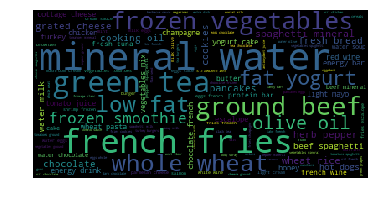

正在保存词云图片。。。 
保存成功！ 


In [287]:
# 数据加载，无特征名
data = pd.read_csv('./Market_Basket_Optimisation.csv',header=None) 

transactions = []  # 将数据存放到transactions中
temp_count = defaultdict(int)  # 统计各个单词的个数

for i in range(0 , data.shape[0]):
    temp = []
    for j in range(0 ,data.shape[1]):
        item = str(data.values[i,j])
        if item != 'nan':  # 排除空值
            temp.append(item)
            temp_count[item] += 1    
    transactions.append(temp)
    
all_words = ' '.join( '%s' %item for item in transactions ) # 将数据转换成str类型

# 生成词云
create_wordcloud(all_words)


去除停用词ing...
分词ing。。。
[ 'mineral water ' , 'eggs ' , 'spaghetti ' , 'french fries ' , 'chocolate ' , 'green tea ' , 'milk ' , 'ground beef ' , 'frozen vegetables ' , 'pancakes ' ]


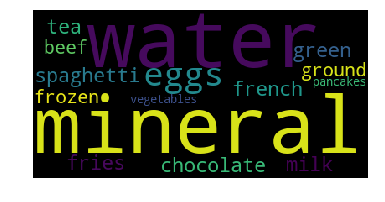

正在保存词云图片。。。 
保存成功！ 


In [305]:
#排名前十词云

temp_count10 = dict(sorted(temp_count.items(),key=lambda x:x[1] , reverse = True)[:10])
temp_count10 = ''.join('%s'%i for i in str(list(temp_count10.keys())))

create_wordcloud(temp_count10)
